<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 5
*Fit splines into single features in your project data. Explore options to obtain the best fit.*

Los datos utilizados en este cuaderno están disponibles aquí: [datasets](https://drive.google.com/drive/folders/159GnBJQDxTY9oYqPBZzdNghyb4Gd9pDS?usp=sharing)

In [1106]:
import numpy as np
import pandas as pd
import itertools
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LarsCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from scipy import interpolate
import scipy.stats
import statsmodels.api as sm
import statsmodels.tools.eval_measures as bias
import seaborn as sns
warnings.filterwarnings("ignore")

from matplotlib.pyplot import figure
from numpy.random import normal
import numpy as np

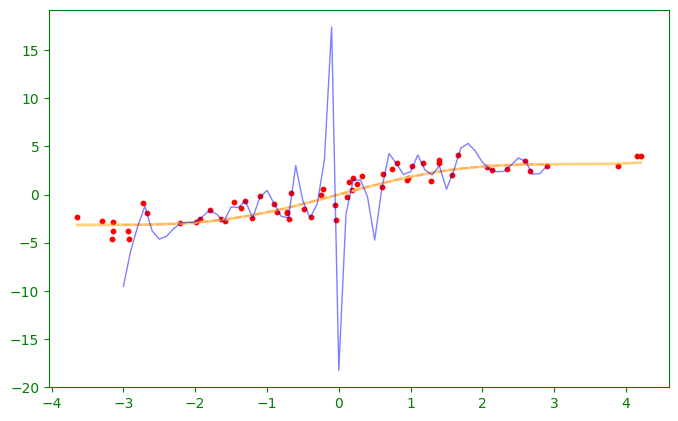

In [1107]:
figure(figsize = (8, 5), dpi = 100)
xt = np.arange(-3, 3, 0.1) # true x coordinates
n  = len(xt)
magnitude = 1 ## noise
x  = np.sort(xt + normal(size = n, scale = magnitude)) # add noise and SORT
yt = np.sin(xt) + xt                                   # true y coordinates
y  = yt + normal(size = n, scale = magnitude)          # add noise

st = interpolate.CubicSpline(xt, yt) # fit a cubic spline to the pure data
s  = interpolate.CubicSpline(x,  y)  # fit a cubic spline to the noisy data

plt.rcParams.update({'text.color': 'green',
                     'xtick.color': 'green',
                     'ytick.color': 'green',
                     'axes.labelcolor': 'green',
                     'axes.edgecolor': 'green',
                     'axes.facecolor':  'none' })
plt.scatter( x,  y,     c = 'red'   , s = 10) # data
plt.plot   ( xt, yt,    c = 'pink'  , linestyle = 'dashed'      ) # pure model
plt.plot   ( x,  st(x), c = 'orange', linewidth = 2, alpha = 0.5) # clean spline
plt.plot   ( xt, s(xt), c = 'blue'  , linewidth = 1, alpha = 0.5) # noisy spline
plt.savefig('spline.png', transparent = True)

## Interpolación spline en datos de demanda eléctrica

In [1108]:
df = pd.read_csv('demanda.csv')

In [1109]:
## Guardamos los datos originales
df    = df[['Y']]
aux   = np.arange(len(df))
dfx   = pd.DataFrame(aux)
dfy   = df 
n     = len(dfx)

In [1110]:
## De la serie original borraremos algunos datos aleatoriamente.
r = round(len(df) * 0.2 )
np.random.seed(0)
random=[]
for i in range(r):
    random.append(np.random.randint(0,len(df)))
missing = []
for i in random:
    if i not in missing:
        missing.append(i)

df_missing = df
dfy_missing = df_missing.drop( index = missing )

dfx_missing = dfx
dfx_missing = dfx_missing.drop( index = missing )

In [1111]:
x = dfx_missing 
y = dfy_missing

In [1112]:
## Spline de primer orden (k = 1)
tck  = interpolate.splrep(x, y, k = 1)
xor1 = np.arange(0, n-1, 1/50)
yor1 = interpolate.splev(xor1, tck)

## Comparamos contra los datos originales usando el MAE
y_or1    = interpolate.splev(dfx, tck) ## Esta variable se usará para comparar contra el original
err_or1  = mean_absolute_error(dfy,y_or1)
print(err_or1)

10.858136422743053


In [1113]:
## Spline de segundo orden (k = 2)
tck  = interpolate.splrep(x, y, k = 2)
xor2 = np.arange(0, n-1, 1/50)
yor2 = interpolate.splev(xor2, tck)

## Comparamos contra los datos originales usando el MAE
y_or2    = interpolate.splev(dfx, tck) ## Esta variable se usará para comparar contra el original
err_or2  = mean_absolute_error(dfy,y_or2)
print(err_or2)

10.810026975929235


In [1114]:
## Spline de tercer orden (k = 3) equivalente a CubicSpline
tck  = interpolate.splrep(x, y, k = 3)
xor3 = np.arange(0, n-1, 1/50)
yor3 = interpolate.splev(xor3, tck)

## Comparamos contra los datos originales usando el MAE
y_or3    = interpolate.splev(dfx, tck) ## Esta variable se usará para comparar contra el original
err_or3  = mean_absolute_error(dfy,y_or3)
print(err_or3)

11.160054735682339


In [1115]:
## Spline de cuarto orden (k = 4)
tck  = interpolate.splrep(x, y, k = 4)
xor4 = np.arange(0, n-1, 1/50)
yor4 = interpolate.splev(xor4, tck)

## Comparamos contra los datos originales usando el MAE
y_or4    = interpolate.splev(dfx, tck) ## Esta variable se usará para comparar contra el original
err_or4  = mean_absolute_error(dfy,y_or4)
print(err_or4)

13.05159952895415


In [1116]:
## Spline de quinto orden (k = 5)
tck  = interpolate.splrep(x, y, k = 5)
xor5 = np.arange(0, n-1, 1/50)
yor5 = interpolate.splev(xor5, tck)

## Comparamos contra los datos originales usando el MAE
y_or5    = interpolate.splev(dfx, tck) ## Esta variable se usará para comparar contra el original
err_or5  = mean_absolute_error(dfy,y_or5)
print(err_or5)

13.868068418630621


No handles with labels found to put in legend.


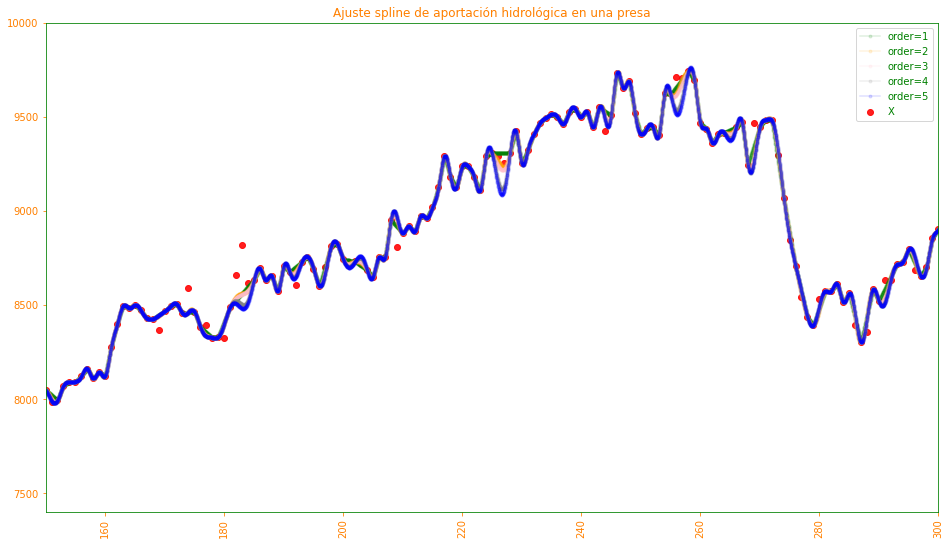

In [1117]:
import matplotlib.animation as animation
fig  = plt.figure(figsize=(16,9))
axes = fig.add_subplot(1, 1, 1)
#plt.style.use("seaborn-poster")
axes.legend()
CYAN = '#76ced6' ; LILA = '#777bd4'
mytitle = plt.title('Ajuste spline de aportación hidrológica en una presa') # get the title property handler #plt.getp(title_obj)
plt.setp(mytitle,    color='#ff8000')                                        #set the color of title to red
axes.xaxis.label.set_color('#ff8000')
axes.yaxis.label.set_color('#ff8000')
axes.tick_params(   colors='#ff8000', which='both')

plt.scatter( dfx, dfy,          color = 'red'    , label = 'X'        ,alpha=7/8)
axes.plot  ( xor1, yor1 , '.-', color = 'green'  , label = 'order=1'  ,alpha=1/8)
axes.plot  ( xor2, yor2 , '.-', color = 'orange' , label = 'order=2'  ,alpha=1/8)
axes.plot  ( xor3, yor3 , '.-', color = 'pink'   , label = 'order=3'  ,alpha=1/8)
axes.plot  ( xor4, yor4 , '.-', color = 'gray'   , label = 'order=4'  ,alpha=1/8)
axes.plot  ( xor5, yor5 , '.-', color = 'blue'   , label = 'order=5'  ,alpha=1/8)

plt.axis([0, 150, 7400, 10000])
plt.axis([150, 300, 7400, 10000])
plt.legend()  
plt.xticks(rotation=90)
plt.savefig('pronodemanda.png', transparent=True)
#plt.legend(['Linear', 'Cubic Spline'])  
plt.show()

## Interpolación spline en series de tiempo de aportaciones en embalses
 Ahora haremos un ejemplo con datos de una serie de tiempo de aportaciones (lluvias) en embalses (presas) de Peñitas (PEA) una de las principales centrales hidroeléctricas en el país, ubicada en Tabasco, México. 

 Queremos probar el uso de splines en interpolación de datos perdidos. La serie original está completa y borraremos algunos datos aleatoriamente. Despúes los completaremos usando interpolación líneal y c´´ubica y compararemos su desempeño usando el error absoluto medio. 

In [1118]:
## Leemos y guardamos los datos originales
df  = pd.read_csv('Aportaciones_Embalses.csv')
df  = df.dropna() ## remove all lines with missing observations
dfx = df['x']  
reservoir=['MMT'] ## Solo tomaremos Peñitas pero podría ser cualquiera de los demás embalses
dfy = df[reservoir] 
n = len(dfx)

In [1119]:
## De la serie original borraremos algunos datos aleatoriamente.
r = round(len(df) * 0.2 )
np.random.seed(0)
random=[]
for i in range(r):
    random.append(np.random.randint(0,len(df)))
missing = []
for i in random:
    if i not in missing:
        missing.append(i)

df_missing = df
df_missing = df_missing.drop( index = missing )

dfx_missing = df_missing['x']  
dfy_missing = df_missing[reservoir]

In [1120]:
x = dfx_missing 
y = dfy_missing

In [1121]:
## Spline de primer orden (k = 1)
tck  = interpolate.splrep(x, y, k = 1)
xor1 = np.arange(0, n-1, 1/50)
yor1 = interpolate.splev(xor1, tck)

## Comparamos contra los datos originales usando el MAE
y_or1    = interpolate.splev(dfx, tck) ## Esta variable se usará para comparar contra el original
err_or1  = mean_absolute_error(dfy,y_or1)
print(err_or1)

14.978149789029535


In [1122]:
## Spline de segundo orden (k = 2)
tck  = interpolate.splrep(x, y, k = 2)
xor2 = np.arange(0, n-1, 1/50)
yor2 = interpolate.splev(xor2, tck)

## Comparamos contra los datos originales usando el MAE
y_or2    = interpolate.splev(dfx, tck) ## Esta variable se usará para comparar contra el original
err_or2  = mean_absolute_error(dfy,y_or2)
print(err_or2)

16.654372805818408


In [1123]:
## Spline de tercer orden (k = 3) equivalente a CubicSpline
tck  = interpolate.splrep(x, y, k = 3)
xor3 = np.arange(0, n-1, 1/50)
yor3 = interpolate.splev(xor3, tck)

## Comparamos contra los datos originales usando el MAE
y_or3    = interpolate.splev(dfx, tck) ## Esta variable se usará para comparar contra el original
err_or3  = mean_absolute_error(dfy,y_or3)
print(err_or3)

17.086626607316735


In [1124]:
## Spline de cuarto orden (k = 4)
tck  = interpolate.splrep(x, y, k = 4)
xor4 = np.arange(0, n-1, 1/50)
yor4 = interpolate.splev(xor4, tck)

## Comparamos contra los datos originales usando el MAE
y_or4    = interpolate.splev(dfx, tck) ## Esta variable se usará para comparar contra el original
err_or4  = mean_absolute_error(dfy,y_or4)
print(err_or4)

19.81051662622366


In [1125]:
## Spline de quinto orden (k = 5)
tck  = interpolate.splrep(x, y, k = 5)
xor5 = np.arange(0, n-1, 1/50)
yor5 = interpolate.splev(xor5, tck)

## Comparamos contra los datos originales usando el MAE
y_or5    = interpolate.splev(dfx, tck) ## Esta variable se usará para comparar contra el original
err_or5  = mean_absolute_error(dfy,y_or5)
print(err_or5)

21.020258604267532


In [1126]:
## InterpolatedUnivariateSpline
s = interpolate.InterpolatedUnivariateSpline(x, y)
xus = np.arange(0, n-1, 1/50)
yus = s(xus)

## Comparamos contra los datos originales usando el MAE
y_us    = s(dfx) ## Esta variable se usará para comparar contra el original
err_us  = mean_absolute_error(dfy,y_us)
print(err_us)

17.086626607316735


In [1127]:
## B-spline interpolation
tck = interpolate.splrep(x, y, s=0, k=3) 
xbs = np.arange(0, n-1, 1/50)
ybs = interpolate.BSpline(*tck)(xbs)

## Comparamos contra los datos originales usando el MAE
y_bs    = interpolate.BSpline(*tck)(dfx) ## Esta variable se usará para comparar contra el original
err_bs  = mean_absolute_error(dfy,y_bs)
print(err_bs)

17.086626607316735


In [1128]:
## CubicSpline
xcs = np.arange(0, n-1, 1/50)
cs  = interpolate.CubicSpline(x, y)
ycs = cs(xcs)

## Comparamos contra los datos originales usando el MAE
y_cs    = cs(dfx) ## Esta variable se usará para comparar contra el original
err_cs  = mean_absolute_error(dfy,y_cs)
print(err_cs)

17.086626607316713


No handles with labels found to put in legend.


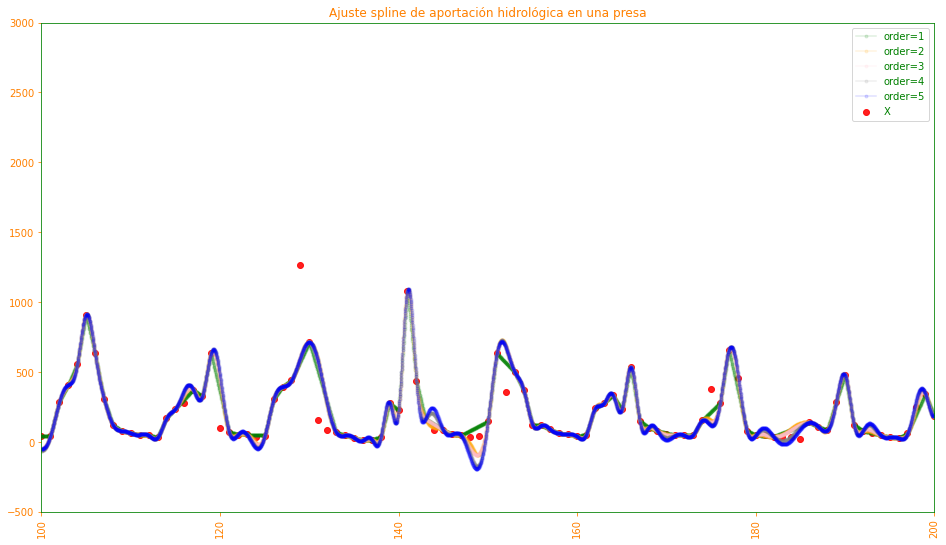

In [1129]:
import matplotlib.animation as animation
fig  = plt.figure(figsize=(16,9))
axes = fig.add_subplot(1, 1, 1)
#plt.style.use("seaborn-poster")
axes.legend()
CYAN = '#76ced6' ; LILA = '#777bd4'
mytitle = plt.title('Ajuste spline de aportación hidrológica en una presa') # get the title property handler #plt.getp(title_obj)
plt.setp(mytitle,    color='#ff8000')                                        #set the color of title to red
axes.xaxis.label.set_color('#ff8000')
axes.yaxis.label.set_color('#ff8000')
axes.tick_params(   colors='#ff8000', which='both')

plt.scatter( dfx, dfy,          color = 'red'    , label = 'X'        ,alpha=7/8)
axes.plot  ( xor1, yor1 , '.-', color = 'green'  , label = 'order=1'  ,alpha=1/8)
axes.plot  ( xor2, yor2 , '.-', color = 'orange' , label = 'order=2'  ,alpha=1/8)
axes.plot  ( xor3, yor3 , '.-', color = 'pink'   , label = 'order=3'  ,alpha=1/8)
axes.plot  ( xor4, yor4 , '.-', color = 'gray'   , label = 'order=4'  ,alpha=1/8)
axes.plot  ( xor5, yor5 , '.-', color = 'blue'   , label = 'order=5'  ,alpha=1/8)
#axes.plot  ( xbs,  ybs  , '.-', color = 'cyan'   , label = 'B-spline ',alpha=1/8)

plt.axis([100, 200, -500, 3000])
#plt.axis([200, 400, -500, 3000])
#plt.axis([400, 600, -500, 3000])
plt.legend()  
plt.xticks(rotation=90)
plt.savefig('pronodemanda.png', transparent=True)
#plt.legend(['Linear', 'Cubic Spline'])  
plt.show()

### Ligas usadas en este apartado de splines

[Spline Interpolation Example in Python](https://www.datatechnotes.com/2021/11/spline-interpolation-example-in-python.html)

[Creating and Plotting Cubic Splines in Python](https://www.analytics-link.com/post/2018/08/17/creating-and-plotting-cubic-splines-in-python)


[B-spline Curve Fitting Example in Python](https://www.datatechnotes.com/2021/11/b-spline-fitting-example-in-python.html)

[documentación scipy.interpolate.CubicSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html)